<a href="https://colab.research.google.com/github/frfusch21/DTS_GGU_5/blob/Hartantya-AT/BOG_Taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Improt Data**

In [ ]:
import pandas as pd
import numpy as np

bog = pd.read_csv('/content/drive/MyDrive/Belajar/bog_clean.csv', header=0, sep=',', encoding="Latin1")
bog.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,BogotÃ¡,2016-09-18 01:54:11,2016-09-18 02:17:49,-74.170353,4.622699,-74.119259,4.572322,N,1419,11935,293
1,2,BogotÃ¡,2016-09-18 03:31:05,2016-09-18 03:44:06,-74.123542,4.604075,-74.116125,4.572578,N,782,7101,139
2,3,BogotÃ¡,2016-08-07 03:35:36,2016-09-18 04:30:31,-74.178643,4.646176,-74.178711,4.646367,N,3632095,2655,2534
3,4,BogotÃ¡,2016-09-18 04:31:13,2016-09-18 04:32:19,-74.163398,4.641949,-74.165813,4.640649,N,66,318,52
4,5,BogotÃ¡,2016-09-13 12:07:04,2016-09-18 05:00:44,-74.137539,4.596347,-74.125364,4.576745,N,449620,3228,211


In [ ]:
bog.shape

(3063, 12)

In [ ]:
bog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3063 entries, 0 to 3062
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3063 non-null   int64  
 1   vendor_id           3063 non-null   object 
 2   pickup_datetime     3063 non-null   object 
 3   dropoff_datetime    3063 non-null   object 
 4   pickup_longitude    3063 non-null   float64
 5   pickup_latitude     3063 non-null   float64
 6   dropoff_longitude   3063 non-null   float64
 7   dropoff_latitude    3063 non-null   float64
 8   store_and_fwd_flag  3063 non-null   object 
 9   trip_duration       3063 non-null   int64  
 10  dist_meters         3063 non-null   int64  
 11  wait_sec            3063 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 287.3+ KB


In [ ]:
bog.describe()

,id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec
count,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3.063000e+03,3.063000e+03,3.063000e+03
mean,1532.000000,-74.098884,4.670920,-74.100136,4.669038,9.295603e+04,-1.392301e+06,9.652921e+05
std,884.356263,0.138975,0.091885,0.139508,0.092942,5.899404e+05,5.486590e+07,3.757377e+07
min,1.000000,-76.534419,3.391712,-76.542536,3.391941,2.000000e+00,-2.147484e+09,0.000000e+00
25%,766.500000,-74.123948,4.629166,-74.122538,4.625974,5.385000e+02,1.672000e+03,9.100000e+01
50%,1532.000000,-74.085985,4.683676,-74.089411,4.677560,1.442000e+03,5.375000e+03,3.000000e+02
75%,2297.500000,-74.055464,4.717402,-74.058683,4.719314,3.813000e+03,1.085600e+04,8.445000e+02
max,3063.000000,-73.829723,5.029401,-73.615700,5.029189,1.227617e+07,3.478510e+05,1.471920e+09


In [ ]:
bog['vendor_id'].unique()

array(['BogotÃ¡', 'BogotÃ¡ UberX', 'Bogota UberBlack', 'BogotÃ¡ UberVan',
       'BogotÃ¡ UberAngel'], dtype=object)

In [ ]:
bog['store_and_fwd_flag'].unique()

array(['N'], dtype=object)

# **Visualisasi Data**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
from scipy.stats import kendalltau

In [ ]:
bog.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,BogotÃ¡,2016-09-18 01:54:11,2016-09-18 02:17:49,-74.170353,4.622699,-74.119259,4.572322,N,1419,11935,293
1,2,BogotÃ¡,2016-09-18 03:31:05,2016-09-18 03:44:06,-74.123542,4.604075,-74.116125,4.572578,N,782,7101,139
2,3,BogotÃ¡,2016-08-07 03:35:36,2016-09-18 04:30:31,-74.178643,4.646176,-74.178711,4.646367,N,3632095,2655,2534
3,4,BogotÃ¡,2016-09-18 04:31:13,2016-09-18 04:32:19,-74.163398,4.641949,-74.165813,4.640649,N,66,318,52
4,5,BogotÃ¡,2016-09-13 12:07:04,2016-09-18 05:00:44,-74.137539,4.596347,-74.125364,4.576745,N,449620,3228,211


In [ ]:
bog['trip_duration'].describe()

count    3.063000e+03
mean     9.295603e+04
std      5.899404e+05
min      2.000000e+00
25%      5.385000e+02
50%      1.442000e+03
75%      3.813000e+03
max      1.227617e+07
Name: trip_duration, dtype: float64

In [ ]:
bog['dist_meters'].describe()

count    3.063000e+03
mean    -1.392301e+06
std      5.486590e+07
min     -2.147484e+09
25%      1.672000e+03
50%      5.375000e+03
75%      1.085600e+04
max      3.478510e+05
Name: dist_meters, dtype: float64

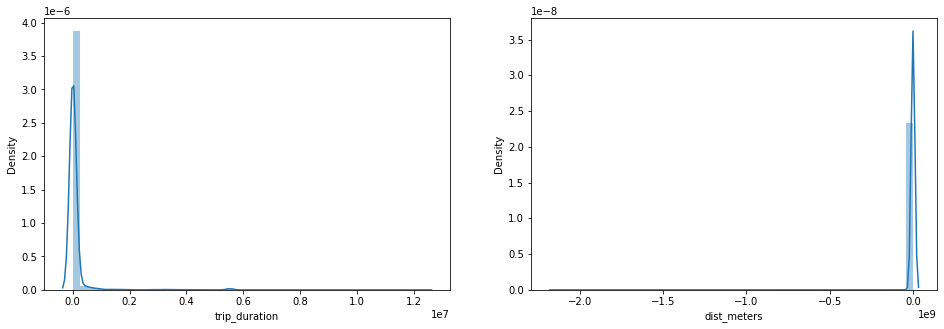

In [ ]:
import warnings

warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(bog['trip_duration'])
plt.subplot(1,2,2)
sns.distplot(bog['dist_meters'])
plt.show()

In [ ]:
bog['dist_meters'] = bog['dist_meters']/1000

In [ ]:
bog = bog[(bog['dist_meters'] <= 50) & (bog['dist_meters'] >= 0)]  
bog.shape

(3013, 12)

In [ ]:
bog['trip_duration'] =  bog['trip_duration']/60

In [ ]:
bog = bog[(bog['trip_duration'] >= 2) & (bog['trip_duration'] <=100. )] # sebelumnya 0.5 dan 350
bog.shape

(2159, 12)

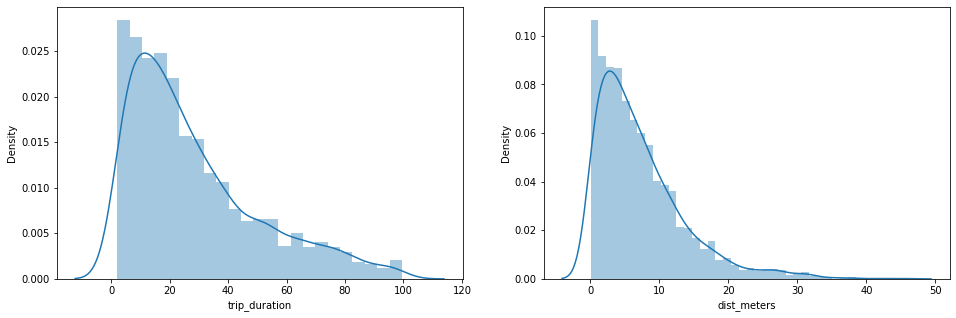

In [ ]:
import warnings

warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(bog['trip_duration'])
plt.subplot(1,2,2)
sns.distplot(bog['dist_meters'])
plt.show()

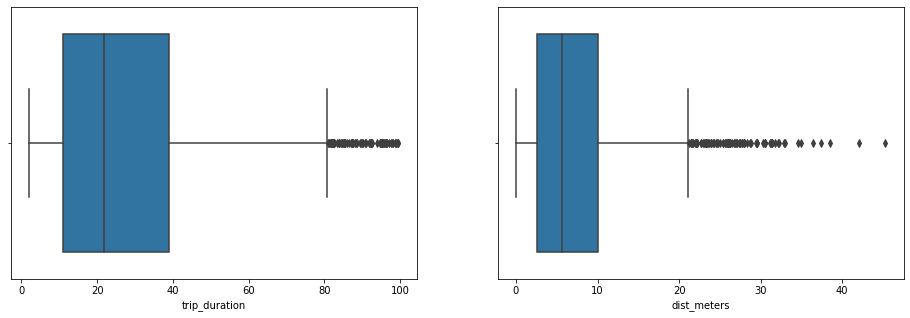

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(bog['trip_duration'])
plt.subplot(1,2,2)
sns.boxplot(bog['dist_meters'])
plt.show()

In [ ]:
percentile25 = bog['trip_duration'].quantile(0.25)
percentile75 = bog['trip_duration'].quantile(0.75)
iqr = percentile75-percentile25
print(percentile25)
print(percentile75)
print(iqr)

bog.shape

11.091666666666667
38.983333333333334
27.891666666666666


(2159, 12)

In [ ]:
#IQR = Q3 - Q1

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print(upper_limit)
print(lower_limit)

80.82083333333333
-30.74583333333333


In [ ]:
bog[bog['trip_duration'] > upper_limit]
bog[bog['trip_duration'] < lower_limit]

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec


In [ ]:
new_df = bog[bog['trip_duration'] < upper_limit]
new_df = bog[bog['trip_duration'] > lower_limit]
new_df.shape

(2159, 12)

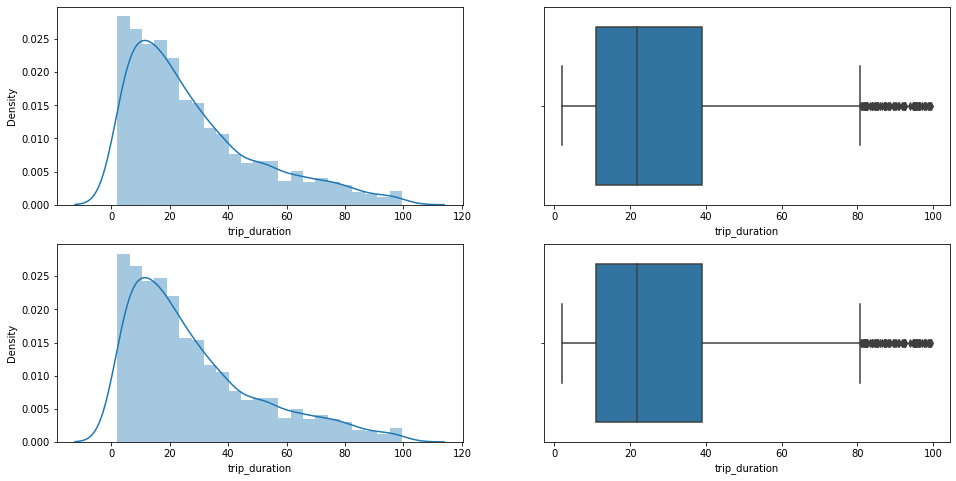

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(bog['trip_duration'])
plt.subplot(2,2,2)
sns.boxplot(bog['trip_duration'])
plt.subplot(2,2,3)
sns.distplot(new_df['trip_duration'])
plt.subplot(2,2,4)
sns.boxplot(new_df['trip_duration'])
plt.show()

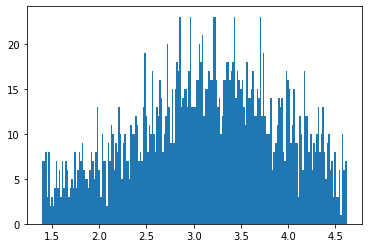

In [ ]:
plt.hist(np.log1p(bog['trip_duration'].values + 1), bins=200)
plt.show()

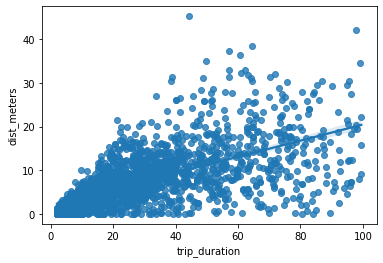

In [ ]:
sns.regplot(x=bog["trip_duration"], y=bog["dist_meters"])

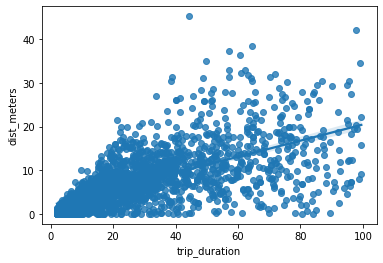

In [ ]:
bog_detail = bog[(bog['dist_meters'] <= 25) & (bog['dist_meters'] >= 0)]  
bog_detail = bog[(bog['trip_duration'] >= 0.5) & (bog['trip_duration'] <=175. )]
sns.regplot(x=bog_detail["trip_duration"], y=bog_detail["dist_meters"])

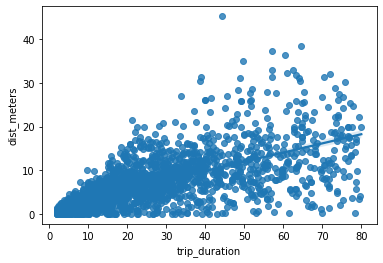

In [ ]:
bog_more_detail = bog[(bog['dist_meters'] <= 20) & (bog['dist_meters'] >= 0)]  
bog_more_detail = bog[(bog['trip_duration'] >= 2) & (bog['trip_duration'] <=80. )]
sns.regplot(x=bog_more_detail["trip_duration"], y=bog_more_detail["dist_meters"])

In [ ]:
vendor_freq = bog.groupby(['vendor_id'])['id'].count().reset_index()
vendor_freq

,vendor_id,id
0,Bogota UberBlack,165
1,BogotÃ¡,1826
2,BogotÃ¡ UberAngel,5
3,BogotÃ¡ UberVan,33
4,BogotÃ¡ UberX,130


## **Calculate Correlation**

In [ ]:
# prepare data
data1 = bog['trip_duration']
data2 = bog['dist_meters']
data3 = bog['wait_sec']
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)
corr, _ = pearsonr(data1, data3)
print('Pearsons correlation: %.3f' % corr)
corr, _ = pearsonr(data3, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.645
Pearsons correlation: 0.012
Pearsons correlation: 0.018


In [ ]:
# prepare data
data1 = bog['trip_duration']
data2 = bog['dist_meters']
data3 = bog['wait_sec']
data4 = bog['vendor_id']
# calculate Pearson's correlation
corr, _ = kendalltau(data4, data1)
print('Kendall Rank correlation: %.5f' % corr)
corr, _ = kendalltau(data4, data2)
print('Kendall Rank correlation: %.5f' % corr)
corr, _ = kendalltau(data4, data3)
print('Kendall Rank correlation: %.5f' % corr)

Kendall Rank correlation: -0.01311
Kendall Rank correlation: 0.01038
Kendall Rank correlation: -0.03194


In [ ]:
np.percentile(bog['dropoff_latitude'], np.arange(0,101))

array([3.40577538, 4.54686842, 4.56533068, 4.57221142, 4.57660424,
       4.5794522 , 4.58203344, 4.58536687, 4.58801339, 4.59026086,
       4.59382391, 4.59565341, 4.59876314, 4.60136412, 4.60415234,
       4.60590348, 4.60816223, 4.61061997, 4.61279108, 4.61539699,
       4.61729797, 4.62084689, 4.62355191, 4.6255977 , 4.62752621,
       4.63008479, 4.63221413, 4.63407553, 4.63555957, 4.6374405 ,
       4.63968762, 4.64120205, 4.64277767, 4.64447583, 4.64650084,
       4.64867909, 4.64940192, 4.65094998, 4.65264425, 4.65466126,
       4.65645759, 4.6586686 , 4.66271715, 4.66519036, 4.66749887,
       4.66914554, 4.67141128, 4.67289005, 4.67544201, 4.67772198,
       4.67930532, 4.68136746, 4.6827594 , 4.68458844, 4.68606681,
       4.68774496, 4.68988251, 4.69144487, 4.69342947, 4.69458188,
       4.69604444, 4.69712978, 4.69839293, 4.69933968, 4.70048302,
       4.70256335, 4.70427204, 4.70474573, 4.70633903, 4.70889539,
       4.71042604, 4.71133642, 4.713536  , 4.71588493, 4.71868

In [ ]:
np.percentile(bog['pickup_latitude'], np.arange(0,101))

array([3.39423064, 4.54717707, 4.56559357, 4.57468666, 4.57792287,
       4.58034931, 4.58318939, 4.58727089, 4.59019762, 4.59350663,
       4.59513213, 4.59864382, 4.6028466 , 4.60480971, 4.60705664,
       4.60913092, 4.61224363, 4.61462414, 4.61558771, 4.61769393,
       4.62064637, 4.6238485 , 4.62610185, 4.62810851, 4.62959719,
       4.63170194, 4.63336238, 4.63636553, 4.63807783, 4.64122751,
       4.64372978, 4.64560048, 4.64796329, 4.64903921, 4.64927174,
       4.64936942, 4.64942299, 4.65009898, 4.65216721, 4.65480606,
       4.65839587, 4.66126834, 4.66539137, 4.66811222, 4.67078661,
       4.6739923 , 4.67729292, 4.67979332, 4.68343707, 4.68633398,
       4.68885778, 4.69018557, 4.69223746, 4.69330398, 4.69360722,
       4.693809  , 4.69430052, 4.69518181, 4.69708138, 4.69832074,
       4.70004377, 4.70104002, 4.70362165, 4.70469918, 4.7048857 ,
       4.70631176, 4.70655873, 4.70663946, 4.70667405, 4.70672112,
       4.7067699 , 4.70695526, 4.70954847, 4.71184413, 4.71417